In [7]:
#path = "data/redux/sample/"
path = "data/redux/"

In [8]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

import utils; reload(utils)
from utils import plots
from vgg16 import Vgg16



In [9]:
batch_size=64
run_epoch = 0

In [21]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.                                                                                                                                                                                    
# NB: They must be in subdirectories named based on their category                                                                                                                                                                            
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 24600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [48]:
run_epoch = 1
epoch_number = 3
vgg.model.load_weights("my_weights_%03d" % (epoch_number-1))
if run_epoch:
    vgg.finetune(batches)
    vgg.fit(batches, val_batches, nb_epoch=1)
    vgg.model.save_weights("my_weights_%03d" % epoch_number)
else:
    pass

Epoch 1/1
24600/24600 [==============================] - 703s - loss: 0.2164 - acc: 0.9569 - val_loss: 0.0722 - val_acc: 0.9825


## Now run the test data

In [87]:
pdir =os.getcwd() + "/" + path + 'test'
#pdir ="data/redux/crome/"
vgg.classes = ["cat", "dog"]


In [50]:
# Actually run the tests
test_batches,results = vgg.test(pdir)

Found 12500 images belonging to 1 classes.


In [54]:

def write_results(batches, results, submit_num):
    filenames = batches.filenames
    isdog = np.clip(results[:,1], 0.02, 0.9825)
    submit_num = "%02d" % int(submit_num)
    submit_fn = "data/redux/caleb_submit_%s.csv" % submit_num

    f = open(submit_fn, "w")
    f.write("id,label\n")
    for i in range(len(isdog)):
        id = filenames[i].split("/")[1].split(".")[0]
        p = isdog[i]
        f.write("%s,%f\n" % (id, p))
    f.close()
    return submit_fn

    from IPython.display import FileLink
    
submit_fn = write_results(test_batches, results, 2)
FileLink(submit_fn)


/home/ubuntu/nbs/data/redux/caleb_submit_02.csv

In [95]:
from keras.preprocessing import image
# 1. A few correct labels at random
path="data/redux/"
batch_size = 64

#vgg.model.load_weights(path)
#val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)
labels = val_batches.classes
filenames = val_batches.filenames
probs = results[:,0]
preds = np.array(np.round(1-probs),dtype=int)
n_view = 4
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/'+filenames[i]) for i in idx], titles = titles)


correct = np.where (preds == labels)
#correct = np.where(np.isclose(preds,labels))[0]
#idx = np.random.permutation(correct)[:n_view]
#idx
#plots_idx (idx, probs[idx])
#image.load_img(path+'valid/'+filenames[0])

labels
",".join(["%d" % x for x in preds])

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


'1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1

In [30]:
test_batches.reset()
batchsize=8
n = 0

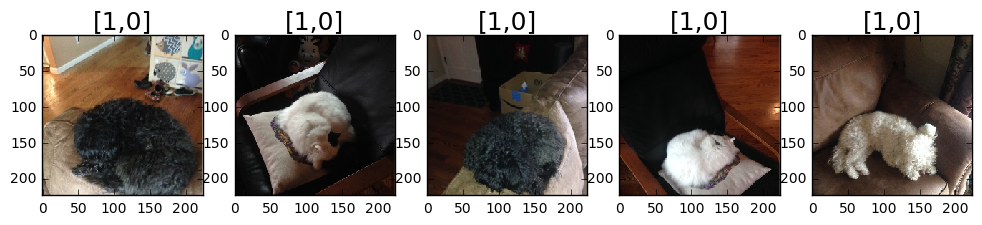

In [31]:
r = np.round(results[(batchsize*n):(batchsize*(n+1))])
titles = ["[%d,%d]" % (a,b) for a, b in r]
plots(test_batches.next(), titles=titles)
n = n  + 1

In [75]:
import cPickle as pickle
test_batches.reset()
batchsize=8
n = 0

x,labels = test_batches.next()
help(x)
#r = np.round(results[(batchsize*n):(batchsize*(n+1))])
#titles = ["[%d,%d]" % (a,b) for a, b in r]
#plots(test_batches.next(), titles=titles)
#n = n  + 1


#r = [test_batches, results]
#f = open("redux.results", "w")
#pickle.dump(r, f)

ValueError: too many values to unpack

In [80]:
help(vgg.model)

Help on Sequential in module keras.models object:

class Sequential(keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |  
 |  # Note
 |      The first layer passed to a Sequential model
 |      should have a defined input shape. What that
 |      means is that it should have received an `input_shape`
 |      or `batch_input_shape` argument,
 |      or for some type of layers (recurrent, Dense...)
 |      an `input_dim` argument.
 |  
 |  # Example
 |  
 |      ```python
 |          model = Sequential()
 |          # first layer must have a defined input shape
 |          model.add(Dense(32, input_dim=500))
 |          # afterwards, Keras does automatic shape inference
 |          model.add(Dense(32))
 |  
 |          # also possible (equivalent to the above):
 |          model = Sequential()
 |          model.add(Dense(32, input_shape=(500,)))
 |          model.add(Dense(32))
 |  
 |          # also possib

In [82]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________